In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [3 0 1 8 3 2 1 2 2 5]


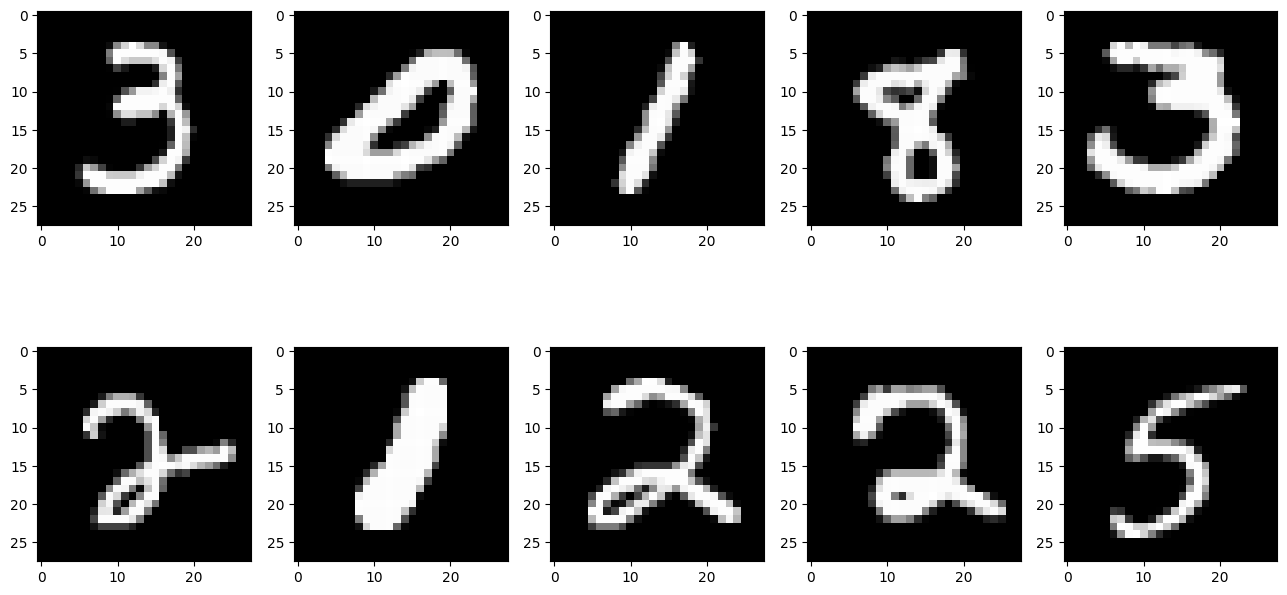

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8489 - loss: 0.5113
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9602 - loss: 0.1290
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9722 - loss: 0.0911
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9785 - loss: 0.0694
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9823 - loss: 0.0571
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0485
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0433
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9877 - loss: 0.0376
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9903 - loss: 0.0293
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0250


Plot the loss and accuracy graphs

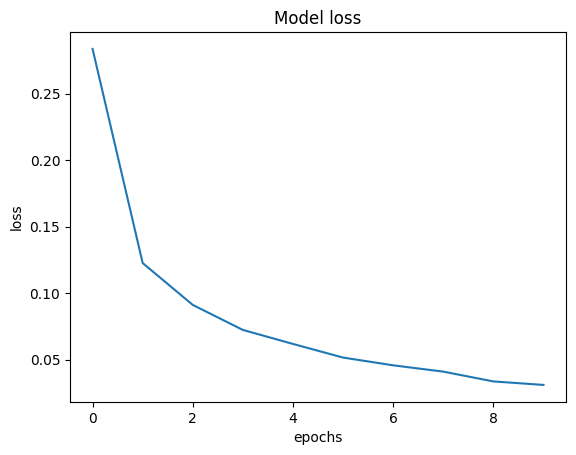

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

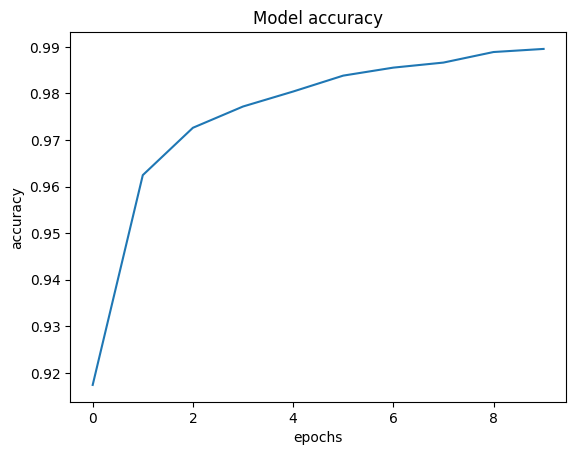

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [13]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1304
Loss of the Test dataset is: 0.12024187296628952
Accuracy of the test dataset is: 0.9689000248908997


Save the model weights

In [16]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

# Questions

Run the MLP_with_MNIST_dataset.ipynb using Jupyter notebook (or google colab) and see if
you can understand the code.

a. Improve the test accuracy of the model by changing the hyperparameters.

b. Add L1 and L2 regularization terms to the model and retrain the model.

c. Visualize class-wise test dataset performance using a confusion matrix.

a. Improve the test accuracy of the model by changing the hyperparameters

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8939 - loss: 0.3596 - val_accuracy: 0.9628 - val_loss: 0.1275
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9700 - loss: 0.0943 - val_accuracy: 0.9724 - val_loss: 0.0921
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9823 - loss: 0.0578 - val_accuracy: 0.9728 - val_loss: 0.0923
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9852 - loss: 0.0461 - val_accuracy: 0.9776 - val_loss: 0.0818
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9884 - loss: 0.0373 - val_accuracy: 0.9725 - val_loss: 0.1073
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9767 - val_loss: 0.0892
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9907 - loss: 0.0285 - val_accuracy: 0.9738 - val_loss: 0.1046
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9915 - loss: 0

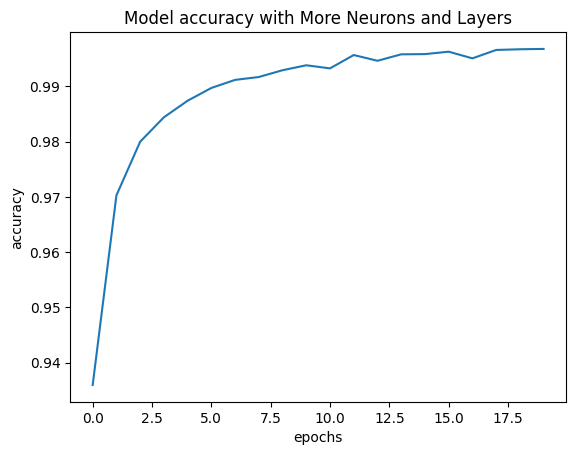

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.1310
Loss of the Test dataset is: 0.10904423892498016
Accuracy of the test dataset is: 0.9821000099182129


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Model with increased neurons (512, 256, 128) and an extra hidden layer
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),  # Increased from 128 to 512 neurons
    Dense(256, activation='relu'),  # Increased from 64 to 256 neurons
    Dense(128, activation='relu'),  # Added extra hidden layer
    Dense(10, activation='softmax')
])

# Compile (same as original, using default Adam optimizer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train with more epochs (20 instead of 10)
train_info = model.fit(new_train_data, new_train_target, epochs=20, validation_split=0.2)

# Plot accuracy (same as original)
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy with More Neurons and Layers')
plt.show()

# Evaluate on test set
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

b. Add L1 and L2 regularization terms to the model and retrain the model.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8415 - loss: 2.0459 - val_accuracy: 0.9180 - val_loss: 0.7169
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9125 - loss: 0.6853 - val_accuracy: 0.9253 - val_loss: 0.5844
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9227 - loss: 0.5729 - val_accuracy: 0.9360 - val_loss: 0.5068
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9307 - loss: 0.5167 - val_accuracy: 0.9343 - val_loss: 0.4862
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9331 - loss: 0.4880 - val_accuracy: 0.9415 - val_loss: 0.4591
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9348 - loss: 0.4682 - val_accuracy: 0.9429 - val_loss: 0.4419
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9387 - loss: 0.4515 - val_accuracy: 0.9436 - val_loss: 0.4294
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9399 - loss: 0.4379 - 

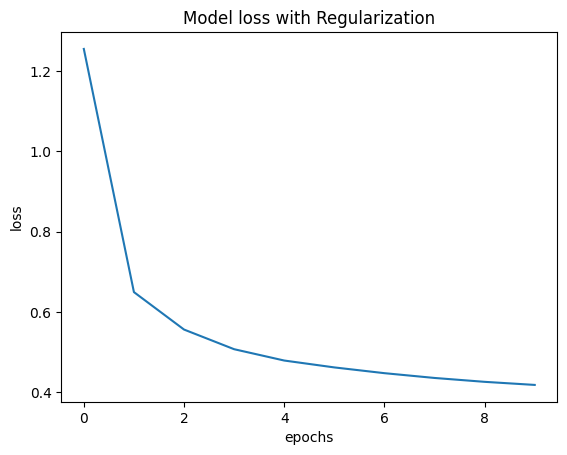

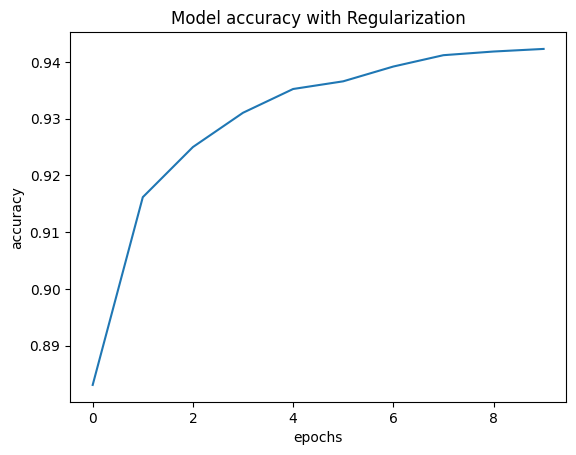

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.4234
Loss of the Test dataset is: 0.395305335521698
Accuracy of the test dataset is: 0.9506000280380249


ValueError: The filename must end in `.weights.h5`. Received: filepath=MNIST_WEIGHTS_REGULARIZED.h5

In [18]:
from tensorflow.keras.regularizers import l1_l2

# Model with L1 + L2 regularization (applied to kernel/weights)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dense(10, activation='softmax')
])

# Compile and train (same as original)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_info = model.fit(new_train_data , new_train_target , epochs=10 , validation_split = 0.2)

# Plot loss/accuracy and evaluate (same as original)
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss with Regularization')
plt.show()

plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy with Regularization')
plt.show()

loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

# Save weights if needed
model.save_weights('MNIST_WEIGHTS_REGULARIZED.h5')

c. Visualize class-wise test dataset performance using a confusion matrix.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


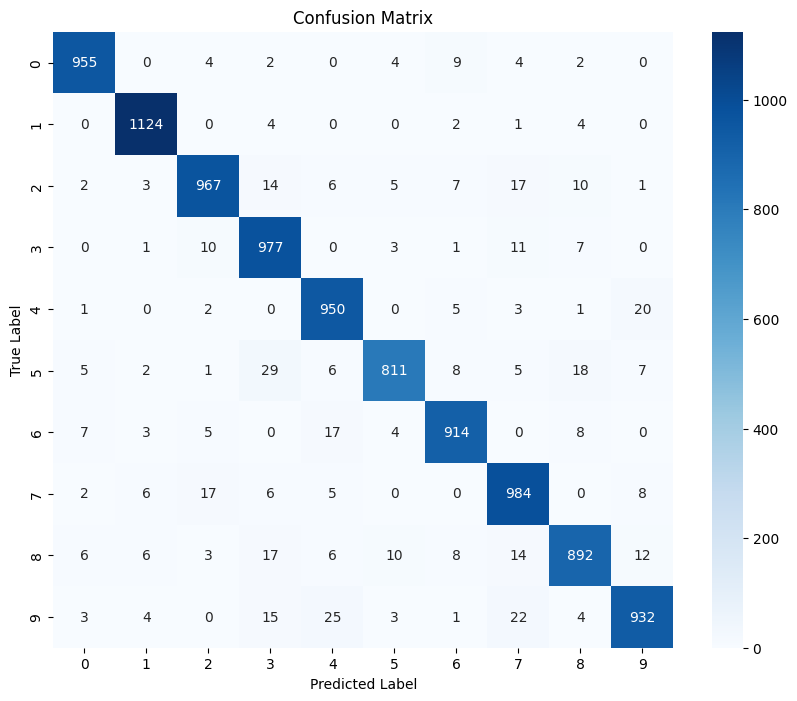

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the model predictions
test_predictions = model.predict(new_test_data)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_target, test_predictions_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()